In [1]:
from utils.dataloader import Dataset
from src.autoencoders.cvae import ConditionalVariationalAutoEncoder
from sklearn.model_selection import train_test_split
from utils.utils import bce_loss, pixel_error_loss

path = 'data/'
scenario = 'no_obj'

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
feature_set = Dataset(path, condition=scenario)
X_train, Y_train, cX_train = feature_set.get_training_set()

X_train, X_val, Y_train, Y_val, cX_train, cX_val = train_test_split(X_train, Y_train, cX_train, test_size=0.2, random_state=42)

def tensor_to_numpy(tensor):
    return tensor.cpu().detach().numpy()

X_train, X_val, Y_train, Y_val, cX_train, cX_val = tensor_to_numpy(X_train), tensor_to_numpy(X_val
    ), tensor_to_numpy(Y_train), tensor_to_numpy(Y_val), tensor_to_numpy(cX_train), tensor_to_numpy(cX_val)

In [3]:
input_dim = X_train[0].shape
latent_dim = 100
conditions_dim = cX_train[0].shape

cvae = ConditionalVariationalAutoEncoder(input_dim=input_dim, conditions_dim=conditions_dim, latent_dim=latent_dim, 
                                         loss_function=[bce_loss, pixel_error_loss])

#cvae.summarize()

In [4]:
#cvae.plot_model()

In [5]:
X_train.shape, Y_train.shape, cX_train.shape

((4341, 3, 64, 64), (4341, 3, 64, 64), (4341, 6))

In [6]:
cvae.train(X_train, cX_train, X_val, cX_val, epochs=2, batch_size=32)

Epoch 1/2
136/136 [==============================] - 75s 535ms/step - loss: 0.5460 - val_loss: 0.5234
Epoch 2/2
136/136 [==============================] - 68s 503ms/step - loss: 0.4444 - val_loss: 0.4001


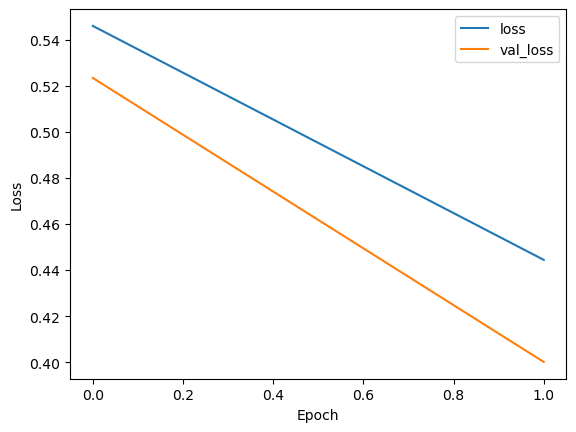

In [7]:
cvae.visualize_loss()